# Задание на лабораторную работу №2. Pandas и основы python
## Общее задание
1. Сгенерировать с использованием библиотеки pandas csv файл, содержащий 3 столбца: $x_1$, $x_2$, $y$ (> 400 строк, генерация с использованием функции linspace). Вид функции определяется вариантом (диапазон выбирается студентом).
2. Открыть файл с использованием библиотеки pandas и построить графики: $y(x_1)$ ($x_2$ - константа), $y(x_2)$  ($x_1$ - константа). Графики необходимо построить с использованием matplotlib (для функции y отобразить точки на графике). 
3. Вывести для каждого столбца $(x_1, x_2, y)$: среднее, минимальное и максимальное значения.
4. Сохранить в новый csv файл те строки, для которых выполняется условие: $x_1$ меньше среднее $x_1$ или $x_2$ меньше среднее $x_2$
5. С использованием mplot3D построить 3D график функции $y(x_1, x_2)$ в отдельном окне.

## Варианты
1. $y = sin(x_1 + x_2)$
2. $y = cos(x_1 + x_2)$
3. $y = tan(x_1 + x_2) * sin(x_1)$
4. $y = 2 * x_1^2 + 3x_2^2$
5. $y = 5 * log(x_1) * log(2 * x_2)$
6. $y = 5 * log(x_1) * x_2^2$
7. $y = cos(x_1) * x_2^3$
8. $y = \frac{3}{(2 + e^{-2x})}$
9. $y = cos(x_1 + x_2) * x_2 ^ 2$
10. $y = \frac{x_2}{(1 + e^{-x_1})}$
11. $y = \frac{3 * x_1}{(1 - e^{-x_2})}$
12. $y = 0.01 * tan(x_1) * x_2^2$
13. $y = x_1^6 + x_2^2 + x_1^3 + 4x_2 + 5$
14. $y = cos(x_1) * x_2^3$
15. $y = tan(x_1) * ctg(x_2)$
16. $y = \frac{sin(x_1)}{(1 + e^{-2x_2})}$
17. $y = \frac{cos(x_1)}{(1 + e^{-2x_1})}$
18. $y = \frac{tan(x_1)}{(3 + e^{-2x_2})}$
19. $y = \frac{ctg(x_1)}{(2 + e^{-2x_2})}$
20. $y = \frac{x_1^2}{(1 + e^{-2x_2})}$


In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('tkAgg')
#%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import pylab
import math

def func(x1, x2):   
    return math.sin(x1 + x2)

def y(x1, x2):
    y = np.zeros(500)
    for i in range(500):
        y[i] = round(func(x1[i], x2[i]), 4)
    return y
        


x1 = np.linspace(350, 1000, num = 500)
x2 = np.linspace(50, 100, num = 500)
y1 = y(np.zeros(500), x1)
y2 = y(np.zeros(500), x2)
y = y(x1, x2)



x2 = np.asarray(x2).reshape(-1, 1)
x1 = np.asarray(x1).reshape(-1, 1)
y = np.asarray(y).reshape(-1, 1)
matr = np.hstack((x1,x2))
matr = np.hstack((matr,y))
df = pd.DataFrame(matr, columns=['x1', 'x2', 'y'])
df.to_csv('normal_distribution.csv',index=False)


C:\Python39\lib\site-packages\ipykernel\eventloops.py:256: RuntimeWarning: coroutine 'Kernel.do_one_iteration' was never awaited
  self.func()


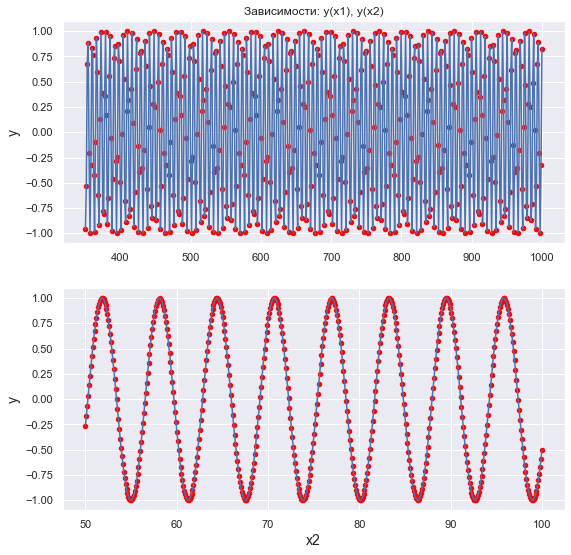

In [3]:
data = pd.read_csv('normal_distribution.csv')

plt.figure(figsize=(9, 9))
plt.subplot(2, 1, 1)
#plt.plot(data['x1'], data['y'])               # построение графика
plt.plot(x1, y1)  
plt.scatter(x1, y1, color='red', s=20, marker='o') # построение точек
plt.title("Зависимости: y(x1), y(x2)") # заголовок
plt.ylabel("y", fontsize=14) # ось ординат
plt.grid(True)                # включение отображение сетки
plt.subplot(2, 1, 2)
plt.plot(x2, y2)               # построение графика
plt.scatter(x2, y2, color='red', s=20, marker='o') #построение точек
plt.xlabel("x2", fontsize=14)  # ось абсцисс
plt.ylabel("y", fontsize=14) # ось ординат
plt.grid(True)                # включение отображение сетки





In [ ]:
descr = data.describe()
'''
descr = descr.agg(
    {
        "x1": ["min", "max",  "mean"],
        "x2": ["min", "max",  "mean"],
        "y": ["min", "max",  "mean"]
    }
)
'''
descr.head(10)



In [ ]:
meanx1 = descr.iloc[1]['x1']
meanx2 = descr.iloc[1]['x2']
data2 = data[(data['x1'] < int(meanx1)) | (data['x2'] < int(meanx2))].head(500)

data2.to_csv('x1LessMeanx1.csv',index=False)
data2.head(500)

In [ ]:
x = data['x1']
z = data['x2']
y = data['y']
ig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.plot(x,y,z, label='parametric curve')
plt.show()